# Import Libraries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

# Library Outlier Handling
from feature_engine.outliers import Winsorizer

from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import pickle

# Data Loading

In [129]:
df = pd.read_csv('sales_data_clean.csv')
pd.set_option('display.max_columns',None)

# Exploratory Data Analysis

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_category  185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  int64  
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
 6   month             185950 non-null  int64  
 7   sales             185950 non-null  float64
 8   city              185950 non-null  object 
 9   hour              185950 non-null  int64  
 10  time_of_day       185950 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 15.6+ MB


In [131]:
df.head()

,product_category,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,time_of_day
0,Laptops and Computers,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,Home Appliances,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,Monitors,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon


In [132]:
df.tail()

,product_category,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,time_of_day
185945,Batterie,AAA Batteries (4-pack),1,2.99,2019-07-06 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,Evening
185946,Monitors,27in FHD Monitor,1,149.99,2019-01-06 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,Evening
185947,Charging Cables,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,Evening
185948,Charging Cables,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,Evening
185949,Batterie,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14,Afternoon


In [133]:
df.describe()

,quantity_ordered,price_each,month,sales,hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,7.059140,185.490917,14.413305
std,0.442793,332.731330,3.502996,332.919771,5.423416
min,1.000000,2.990000,1.000000,2.990000,0.000000
25%,1.000000,11.950000,4.000000,11.950000,11.000000
50%,1.000000,14.950000,7.000000,14.950000,15.000000
75%,1.000000,150.000000,10.000000,150.000000,19.000000
max,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [134]:
# Copy
df_clean = df.copy()

In [135]:
# Delete column yang tidak perlu
df_clean.drop(columns=['purchase_address','order_date'],inplace=True)

In [136]:
df_clean

,product_category,product,quantity_ordered,price_each,month,sales,city,hour,time_of_day
0,Laptops and Computers,Macbook Pro Laptop,1,1700.00,12,1700.00,New York City,0,Night
1,Home Appliances,LG Washing Machine,1,600.00,12,600.00,New York City,7,Morning
2,Charging Cables,USB-C Charging Cable,1,11.95,12,11.95,New York City,18,Evening
3,Monitors,27in FHD Monitor,1,149.99,12,149.99,San Francisco,15,Afternoon
4,Charging Cables,USB-C Charging Cable,1,11.95,12,11.95,Atlanta,12,Afternoon
...,...,...,...,...,...,...,...,...,...
185945,Batterie,AAA Batteries (4-pack),1,2.99,6,2.99,Boston,19,Evening
185946,Monitors,27in FHD Monitor,1,149.99,6,149.99,New York City,19,Evening
185947,Charging Cables,USB-C Charging Cable,1,11.95,6,11.95,San Francisco,18,Evening
185948,Charging Cables,USB-C Charging Cable,1,11.95,6,11.95,San Francisco,18,Evening


In [137]:
# Mencari nilai unique dari kolom kategori
for n in df_clean.columns:
    print(n)
    print(df_clean[n].unique(),end=' ')
    print('\n')

product_category
['Laptops and Computers' 'Home Appliances' 'Charging Cables' 'Monitors'
 'Batterie' 'Audio Devices' 'Phones and Accessories'
 'Entertainment Devices'] 

product
['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'LG Dryer'] 

quantity_ordered
[1 2 4 3 7 5 6 8 9] 

price_each
[1700.    600.     11.95  149.99    3.84   99.99    2.99  999.99   14.95
   11.99  150.    400.    700.    109.99  379.99  300.    389.99] 

month
[12  1  4  5  2  3  8  9  6 11 10  7] 

sales
[1.70000e+03 6.00000e+02 1.19500e+01 1.49990e+02 3.84000e+00 2.39000e+01
 9.99900e+01 1.19600e+01 9.99990e+02 7.68000e+00 5.98000e+00 1.49500e+01
 1.19900e+01 1.50000e+02 4.00000e+02 

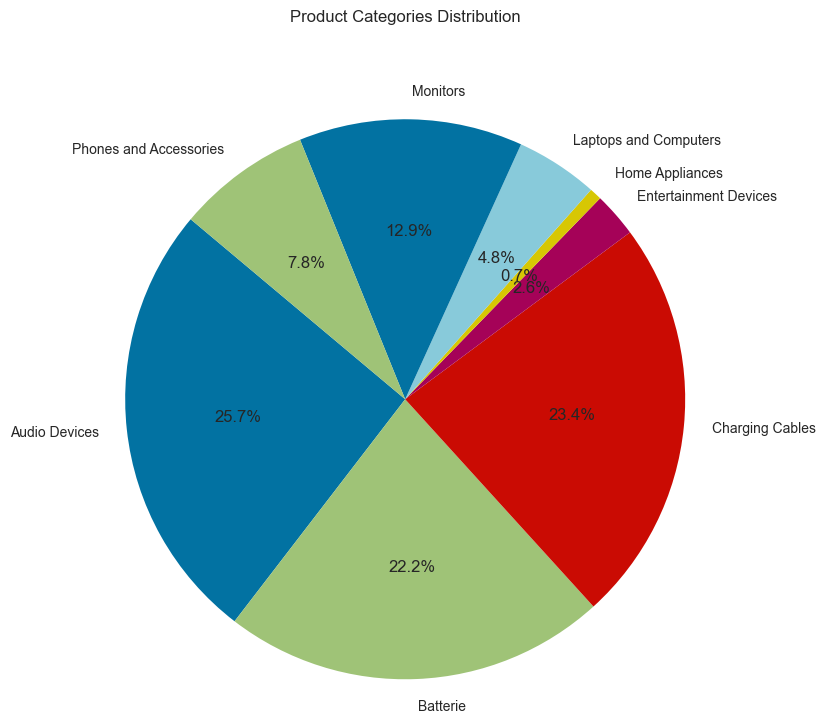

In [138]:
# Product Category Distribution
grouppCategory = df_clean.groupby('product_category')['product_category'].count()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(grouppCategory, labels=grouppCategory.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Categories Distribution',pad=50)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

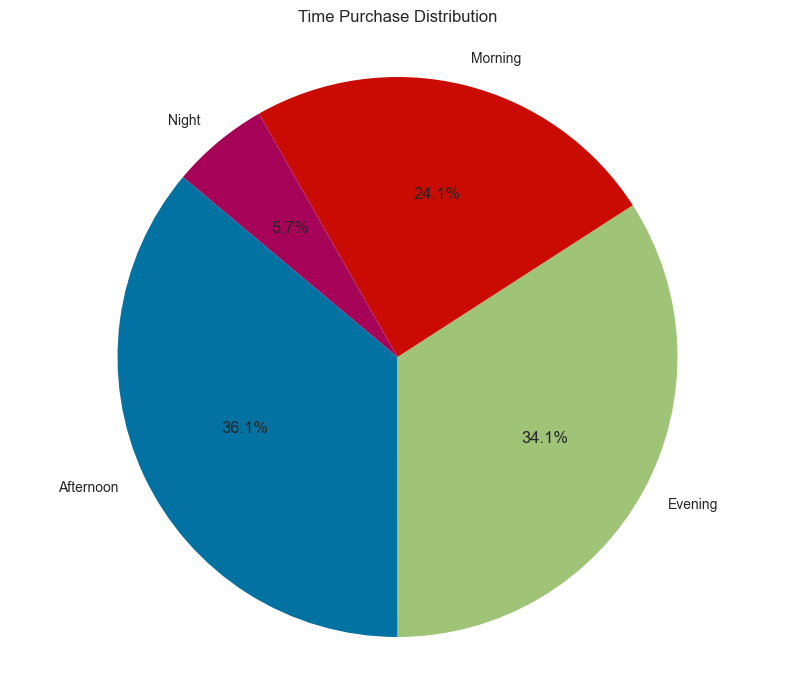

In [139]:
# Time Purchase Distribution (Morning, Afternoon, Evening, Night)
groupedTime = df_clean.groupby('time_of_day')['time_of_day'].count()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(groupedTime, labels=groupedTime.index, autopct='%1.1f%%', startangle=140)
plt.title('Time Purchase Distribution',pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


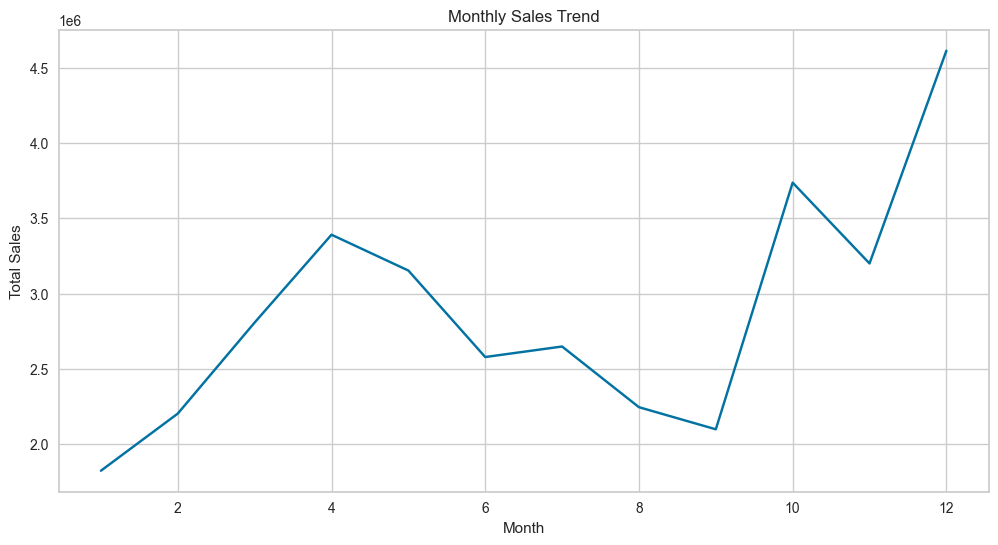

In [140]:
# Monthly Sales Trend
monthly_sales = df_clean.groupby('month')['sales'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

/var/folders/v6/tfg0h80n4dq87291tslqlg0r0000gn/T/ipykernel_997/2573295803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


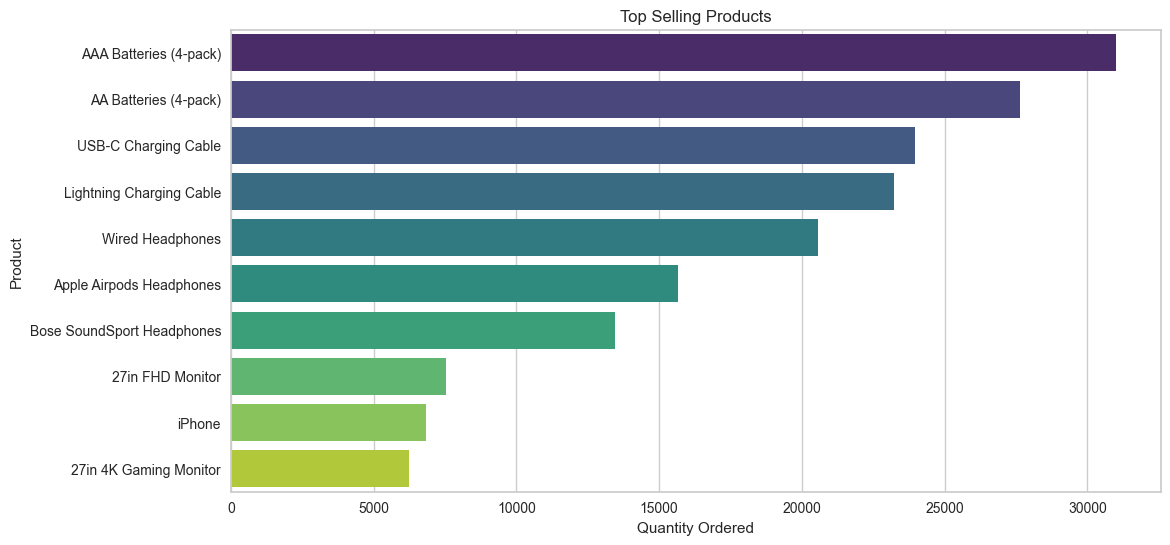

In [141]:
# Top Selling Products
top_products = df_clean.groupby('product')['quantity_ordered'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top Selling Products')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()


/var/folders/v6/tfg0h80n4dq87291tslqlg0r0000gn/T/ipykernel_997/1021700388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='viridis')


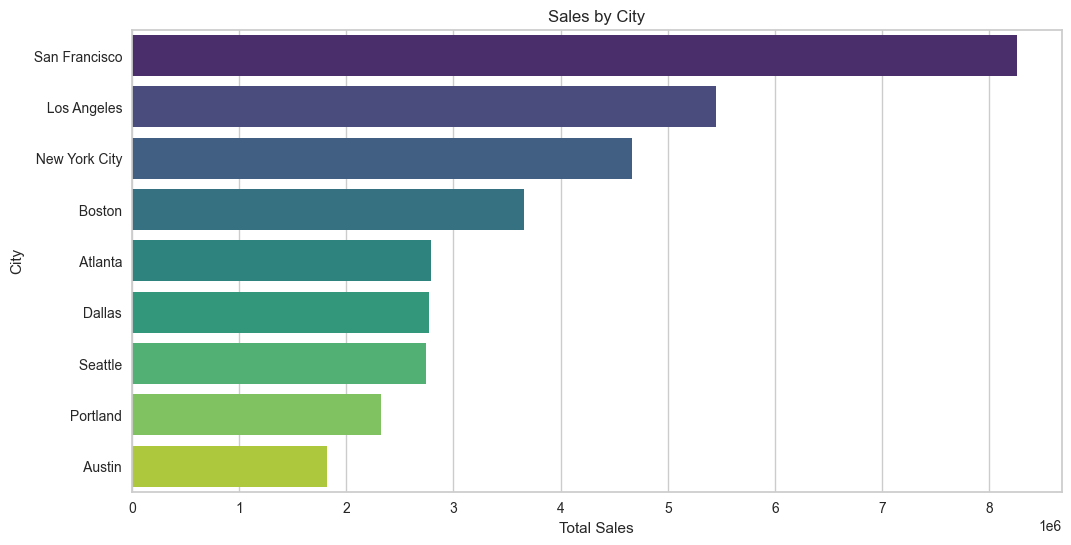

In [142]:
# Sales By City
city_sales = df_clean.groupby('city')['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.values, y=city_sales.index, palette='viridis')
plt.title('Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

/var/folders/v6/tfg0h80n4dq87291tslqlg0r0000gn/T/ipykernel_997/2701820717.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time_of_day', y='sales', hue='product_category', data=df_clean, ci=None)


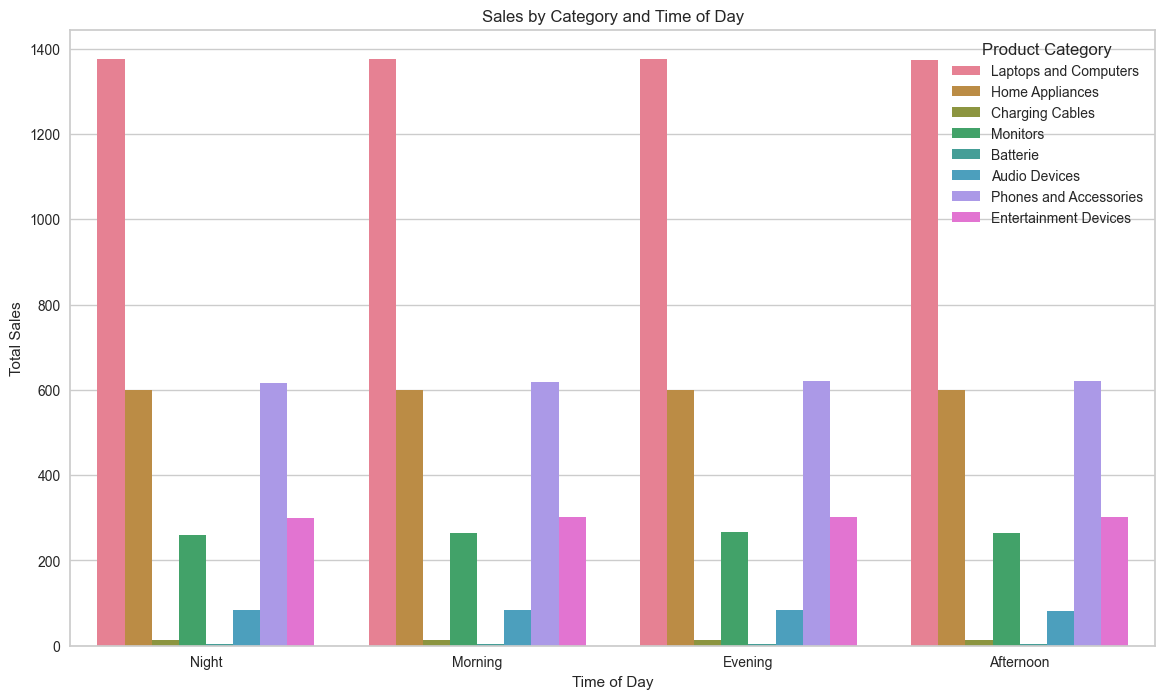

In [143]:
# Sales by Category and Time of Day
plt.figure(figsize=(14, 8))
sns.barplot(x='time_of_day', y='sales', hue='product_category', data=df_clean, ci=None)
plt.title('Sales by Category and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.show()


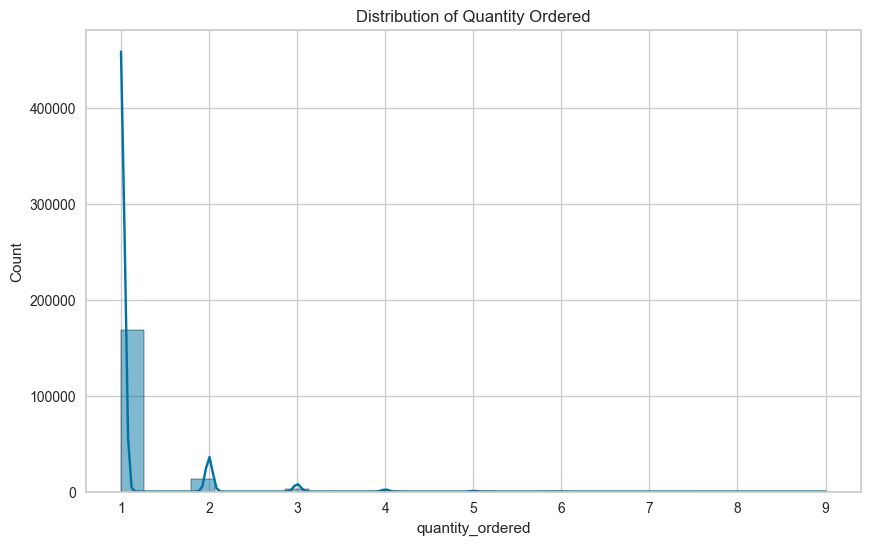

In [144]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['quantity_ordered'], bins=30, kde=True)
plt.title('Distribution of Quantity Ordered')
plt.show()

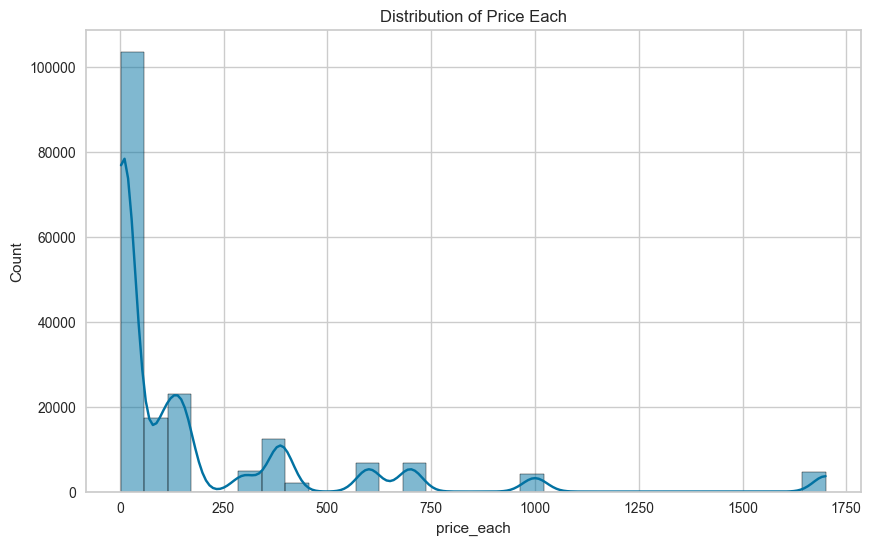

In [145]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price_each'], bins=30, kde=True)
plt.title('Distribution of Price Each')
plt.show()

/var/folders/v6/tfg0h80n4dq87291tslqlg0r0000gn/T/ipykernel_997/2018108741.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='month', y='sales', palette='magma')  # You can choose any palette


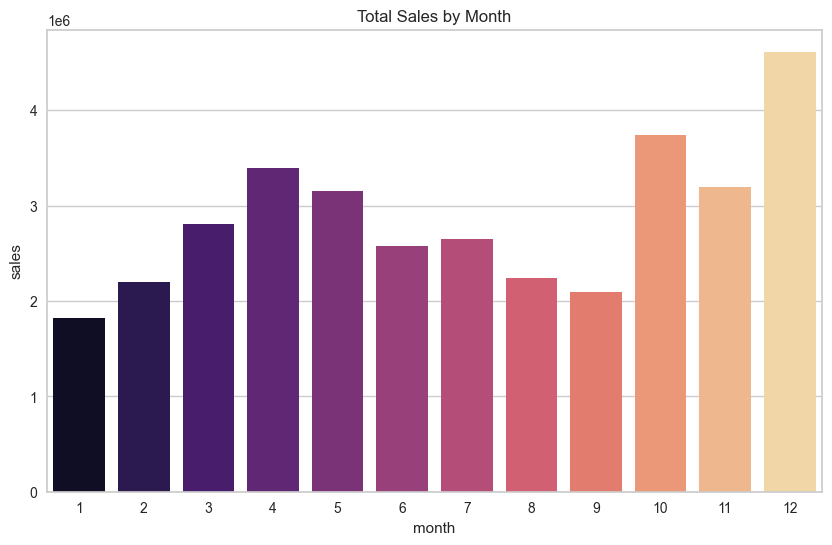

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming monthly_sales DataFrame is already created
monthly_sales = df_clean.groupby('month')['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='month', y='sales', palette='magma')  # You can choose any palette
plt.title('Total Sales by Month')
plt.show()


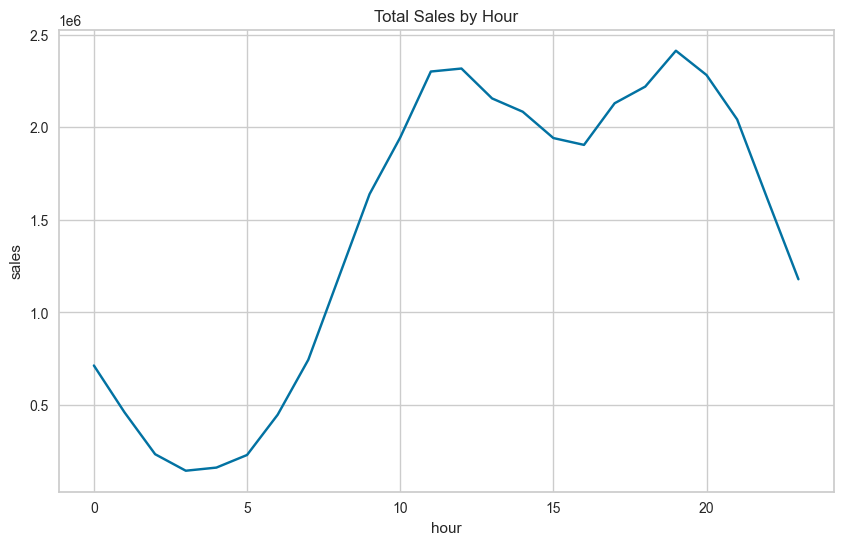

In [147]:
# Plot sales by hour
hourly_sales = df_clean.groupby('hour')['sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sales, x='hour', y='sales')
plt.title('Total Sales by Hour')
plt.show()

# Feature Engineering

## Handling Missing Value

In [148]:
# Check Missing Value
df_clean.isna().sum()

product_category    0
product             0
quantity_ordered    0
price_each          0
month               0
sales               0
city                0
hour                0
time_of_day         0
dtype: int64

## Handling Outlier

In [149]:
# Memisahkan numerical dengan categorical
num_cols = df_clean.select_dtypes(exclude='object')
cat_cols = df_clean.select_dtypes(include=['object','int64'])

num_cols = num_cols.drop(columns=['month','hour','quantity_ordered'])

In [150]:
# check kolom kategori dan kolom numerikal
display(cat_cols)
display(num_cols)

,product_category,product,quantity_ordered,month,city,hour,time_of_day
0,Laptops and Computers,Macbook Pro Laptop,1,12,New York City,0,Night
1,Home Appliances,LG Washing Machine,1,12,New York City,7,Morning
2,Charging Cables,USB-C Charging Cable,1,12,New York City,18,Evening
3,Monitors,27in FHD Monitor,1,12,San Francisco,15,Afternoon
4,Charging Cables,USB-C Charging Cable,1,12,Atlanta,12,Afternoon
...,...,...,...,...,...,...,...
185945,Batterie,AAA Batteries (4-pack),1,6,Boston,19,Evening
185946,Monitors,27in FHD Monitor,1,6,New York City,19,Evening
185947,Charging Cables,USB-C Charging Cable,1,6,San Francisco,18,Evening
185948,Charging Cables,USB-C Charging Cable,1,6,San Francisco,18,Evening


,price_each,sales
0,1700.00,1700.00
1,600.00,600.00
2,11.95,11.95
3,149.99,149.99
4,11.95,11.95
...,...,...
185945,2.99,2.99
185946,149.99,149.99
185947,11.95,11.95
185948,11.95,11.95


In [151]:
# Diagnose outliers
# buat fungsi diagnostic
def diagnostic_plots(num,kolom):
    # Define figure size
    plt.figure(figsize=(16,4))

    #histogram
    plt.subplot(1,2,1)
    sns.histplot(num[kolom],bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=num[kolom])
    plt.title('Boxplot')

    plt.show()

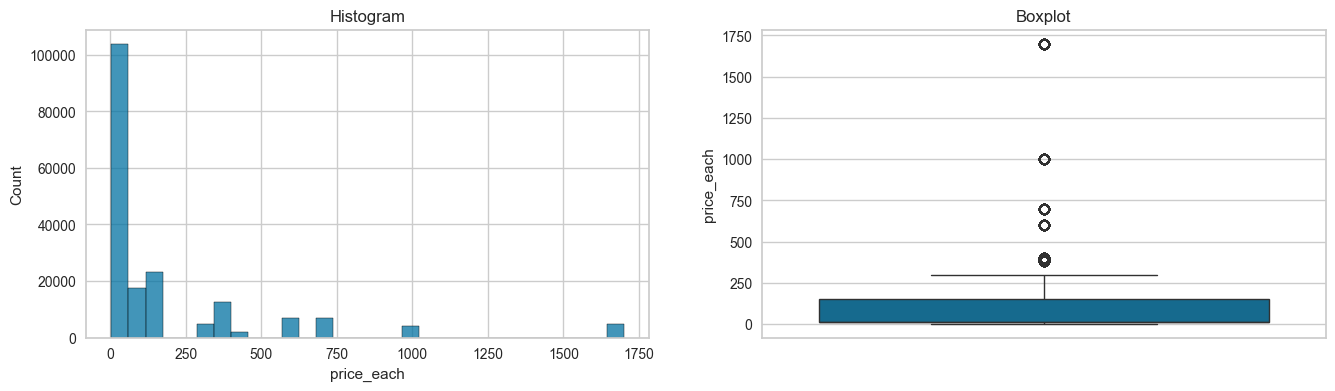

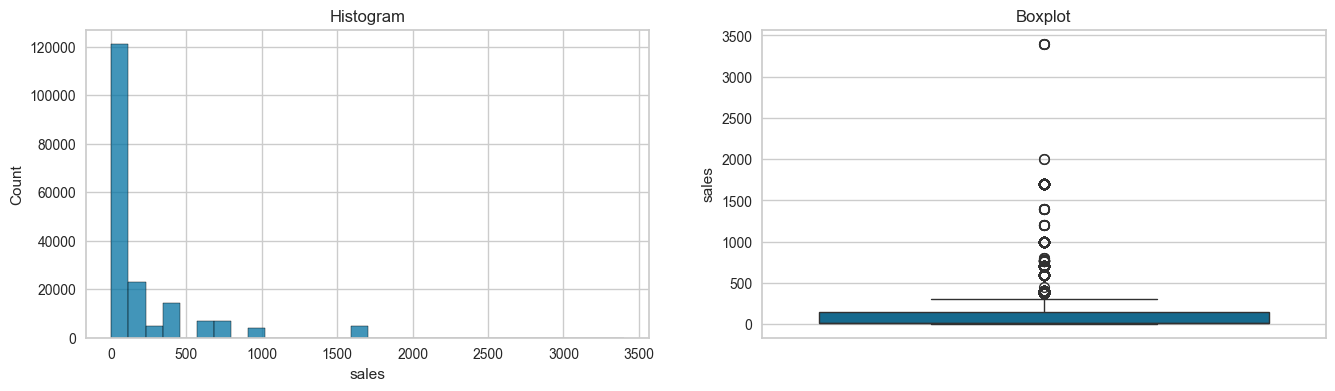

In [152]:
# looping function
for col in num_cols.columns:
    diagnostic_plots(num_cols, col)

In [153]:
# Pengecekan jumlah outlier menggunakan IQR
for k in num_cols:
    Q3 = num_cols[k].quantile(.75)
    Q1 = num_cols[k].quantile(.25)

    IQR = Q3-Q1

    # Karena data highly skew, maka menggunakan fold 3
    upperBound = Q3 + (3 * IQR)
    lowerBound = Q1 - (3 * IQR)

    outlier = num_cols[(num_cols[k]>upperBound) | (num_cols[k]<lowerBound)]

    print(k)
    print('Count of outliers:', outlier.shape[0])
    print('Percent of outliers:', (outlier.shape[0] / num_cols.shape[0]) * 100, '%')
    print('=' * 60)

price_each
Count of outliers: 22531
Percent of outliers: 12.11669803710675 %
sales
Count of outliers: 22585
Percent of outliers: 12.145738101640227 %


In [154]:
# Pemisahan data skew atau normal atau low variance

# List kosong untuk distribusi normal
data_normal = []
col_normal = []

# List kosong untuk distribusi Skew
data_skew = []
col_skew = []

# Batas variance, jika lebih kecil berarti low variance, jika lebih besar berarti high variance
variance_threshold = 0.25

# Looping untuk memasukan data normal dan data skew ke list masing-masing
for num in num_cols:
    skewness = num_cols[num].skew()
    variance = num_cols[num].var()
    
    # Jika data low var tapi high skew
    if variance < variance_threshold and (skewness<-1 or skewness>1):
        col_normal.append(num)
        data_normal.append([num, skewness,variance,'low variance highly skew'])
    # Jika data low skew maka normal
    else:
        if skewness <= 0.5 and skewness >= -0.5:
            col_normal.append(num)
            data_normal.append([num, skewness])

        # Jika data high negative skew
        elif skewness < -1:
            col_skew.append(num)
            data_skew.append([num, skewness, 'high'])

        # Jika data high positive skew
        elif skewness > 1:
            col_skew.append(num)
            data_skew.append([num, skewness, 'high'])

        # Jika data moderate negative skew
        elif skewness <= -0.5 and skewness > -1:
            col_skew.append(num)
            data_skew.append([num, skewness, 'low'])

        # jika data moderate positive skew
        elif skewness >= 0.5 and skewness < 1:
            col_skew.append(num)
            data_skew.append([num, skewness, 'low'])

In [155]:
col_normal

[]

In [156]:
col_skew

['price_each', 'sales']

In [157]:
# check skew numerical
num_cols.skew()

price_each    2.872149
sales         2.881913
dtype: float64

In [158]:
winsorizerSkew = Winsorizer(capping_method='iqr',
                            tail='right',
                            fold=3,
                            variables=col_skew)

num_capped = winsorizerSkew.fit_transform(df_clean)

In [159]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

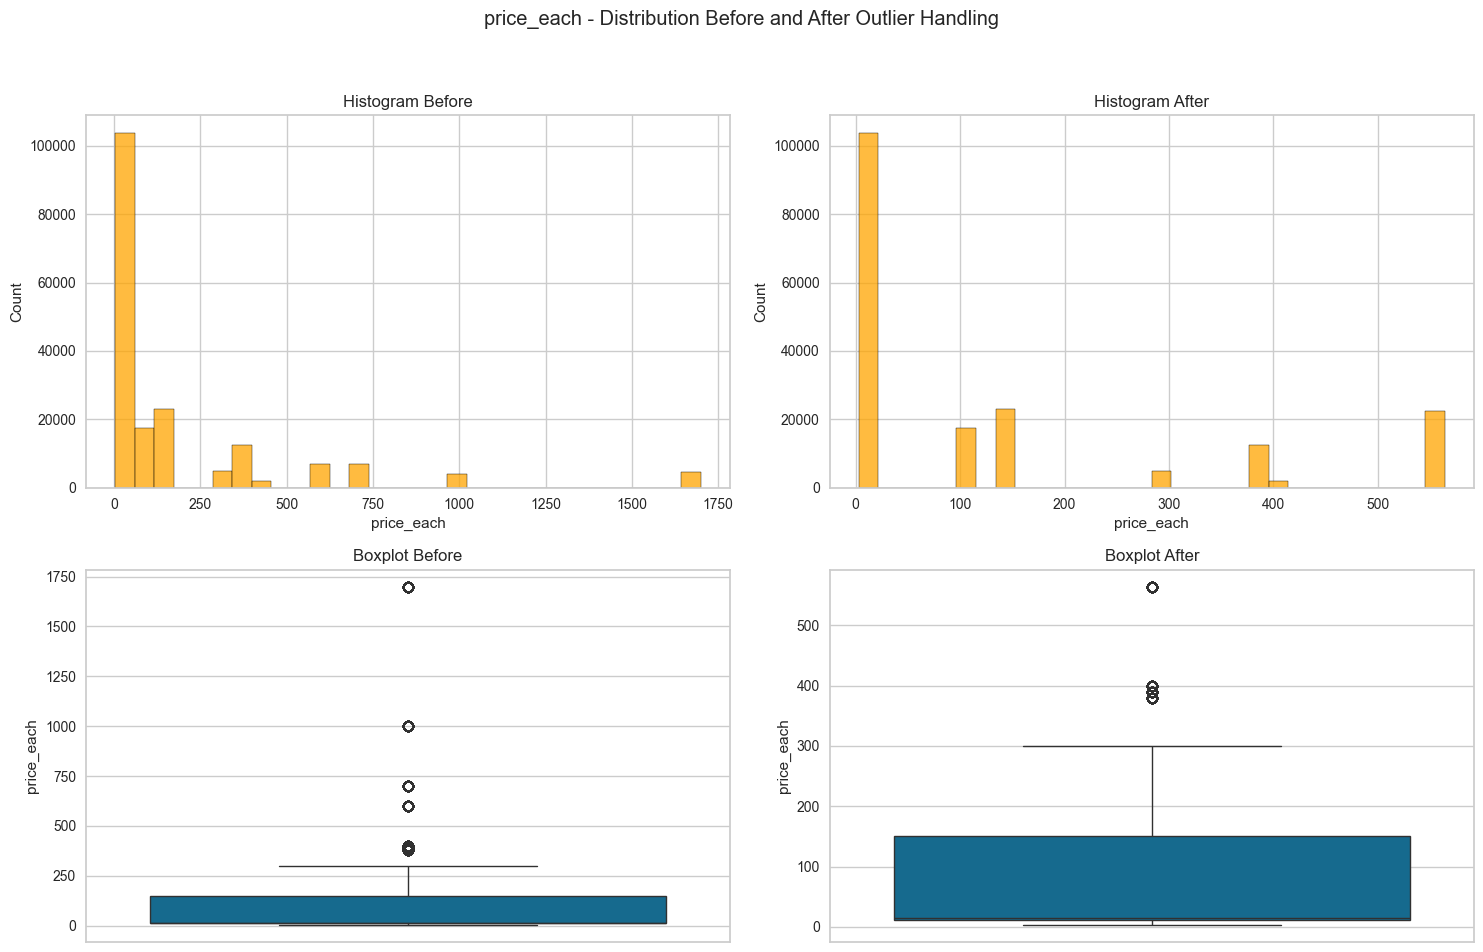

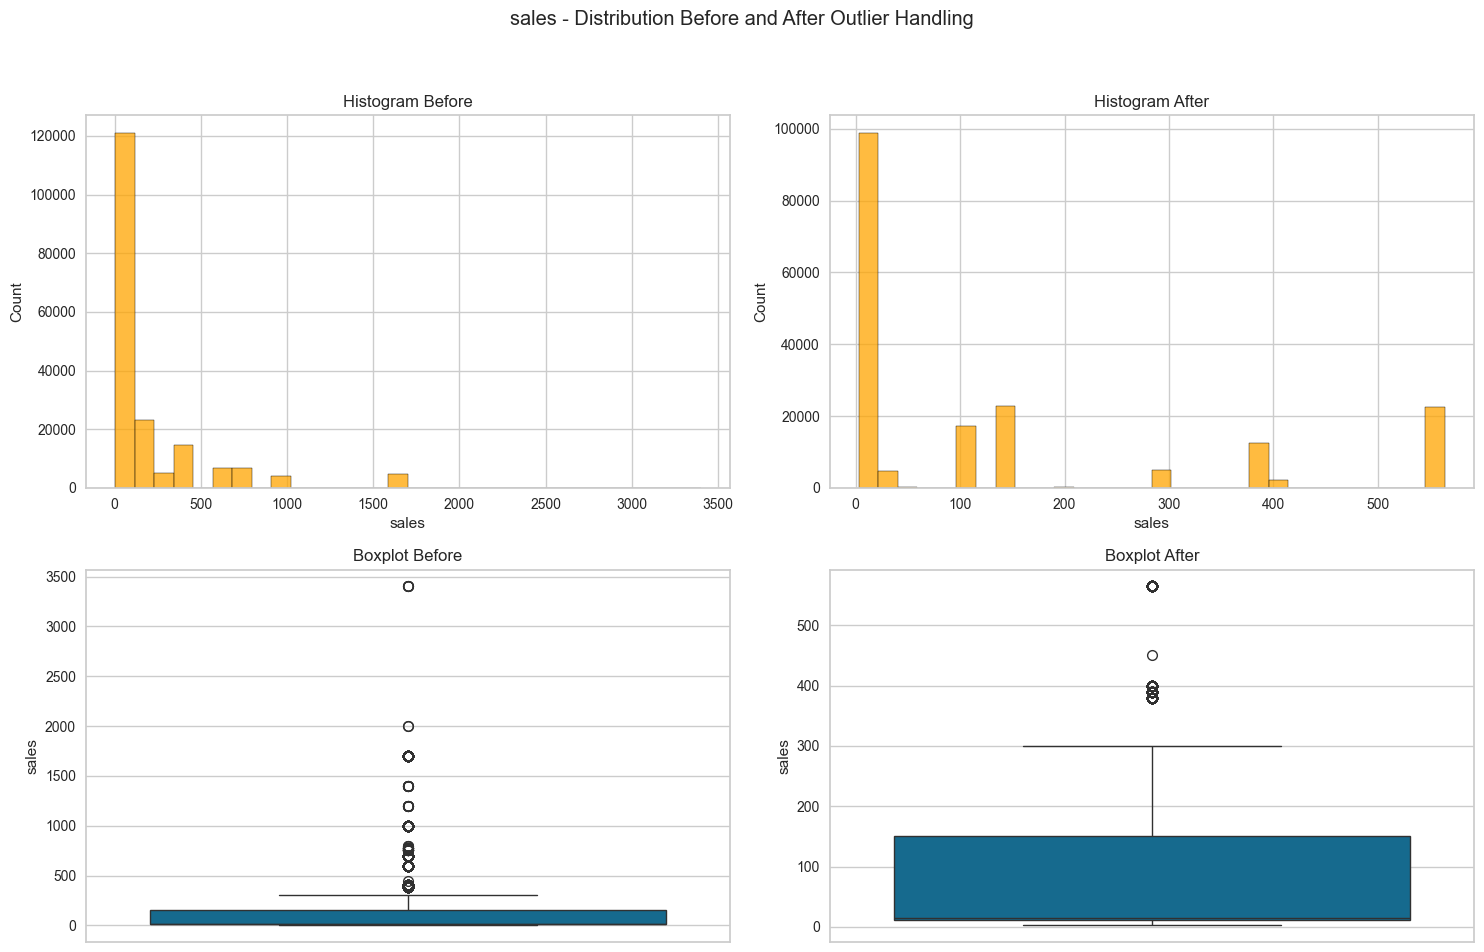

In [160]:
# Visualisasi before after capping
for num in num_cols:
    outlier_handling_plot_comparison(df_clean, num_capped, num)

## Scaling Encoding

In [161]:
# Preparing Data
num_columns = num_capped.select_dtypes(include='float64').columns.tolist()
cat_columns = num_capped.select_dtypes(include=['object']).columns.tolist()

df_scaling = num_capped[num_columns]
df_cat = num_capped[cat_columns]

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['price_each', 'sales']
Cat Columns :  ['product_category', 'product', 'city', 'time_of_day']


In [162]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_scaling)
scale_num_col = scaler.get_feature_names_out(df_scaling.columns)
len(df_scaled[0])

2

In [163]:
ohe = OneHotEncoder(sparse_output=False)
df_encoded = ohe.fit_transform(df_clean[cat_columns])
encode_cat_col = ohe.get_feature_names_out(df_cat.columns)
len(df_encoded[0])

40

In [164]:
df_final = np.concatenate([df_encoded,df_scaled],axis=1)
col_name = list(encode_cat_col)+list(scale_num_col)
df_final = pd.DataFrame(df_final,columns=col_name)

In [165]:
# from sklearn.metrics.pairwise import cosine_similarity

# # Calculate cosine similarity between products
# cosine_sim = cosine_similarity(df_final)

In [166]:
df_final[['quantity_ordered','hour']] = df_clean[['quantity_ordered','hour']]

In [167]:
df_clean

,product_category,product,quantity_ordered,price_each,month,sales,city,hour,time_of_day
0,Laptops and Computers,Macbook Pro Laptop,1,1700.00,12,1700.00,New York City,0,Night
1,Home Appliances,LG Washing Machine,1,600.00,12,600.00,New York City,7,Morning
2,Charging Cables,USB-C Charging Cable,1,11.95,12,11.95,New York City,18,Evening
3,Monitors,27in FHD Monitor,1,149.99,12,149.99,San Francisco,15,Afternoon
4,Charging Cables,USB-C Charging Cable,1,11.95,12,11.95,Atlanta,12,Afternoon
...,...,...,...,...,...,...,...,...,...
185945,Batterie,AAA Batteries (4-pack),1,2.99,6,2.99,Boston,19,Evening
185946,Monitors,27in FHD Monitor,1,149.99,6,149.99,New York City,19,Evening
185947,Charging Cables,USB-C Charging Cable,1,11.95,6,11.95,San Francisco,18,Evening
185948,Charging Cables,USB-C Charging Cable,1,11.95,6,11.95,San Francisco,18,Evening


In [168]:
df_final

,product_category_Audio Devices,product_category_Batterie,product_category_Charging Cables,product_category_Entertainment Devices,product_category_Home Appliances,product_category_Laptops and Computers,product_category_Monitors,product_category_Phones and Accessories,product_20in Monitor,product_27in 4K Gaming Monitor,product_27in FHD Monitor,product_34in Ultrawide Monitor,product_AA Batteries (4-pack),product_AAA Batteries (4-pack),product_Apple Airpods Headphones,product_Bose SoundSport Headphones,product_Flatscreen TV,product_Google Phone,product_LG Dryer,product_LG Washing Machine,product_Lightning Charging Cable,product_Macbook Pro Laptop,product_ThinkPad Laptop,product_USB-C Charging Cable,product_Vareebadd Phone,product_Wired Headphones,product_iPhone,city_ Atlanta,city_ Austin,city_ Boston,city_ Dallas,city_ Los Angeles,city_ New York City,city_ Portland,city_ San Francisco,city_ Seattle,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,price_each,sales,quantity_ordered,hour
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.978269,3.978269,1,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.978269,3.978269,1,7
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.021731,-0.021731,1,18
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.978196,0.978196,1,15
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.021731,-0.021731,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.086635,-0.086635,1,19
185946,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.978196,0.978196,1,19
185947,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.021731,-0.021731,1,18
185948,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.021731,-0.021731,1,18


## Feature Selection

### PCA

In [169]:
pca = PCA()
pca.fit(df_final)

PCA()

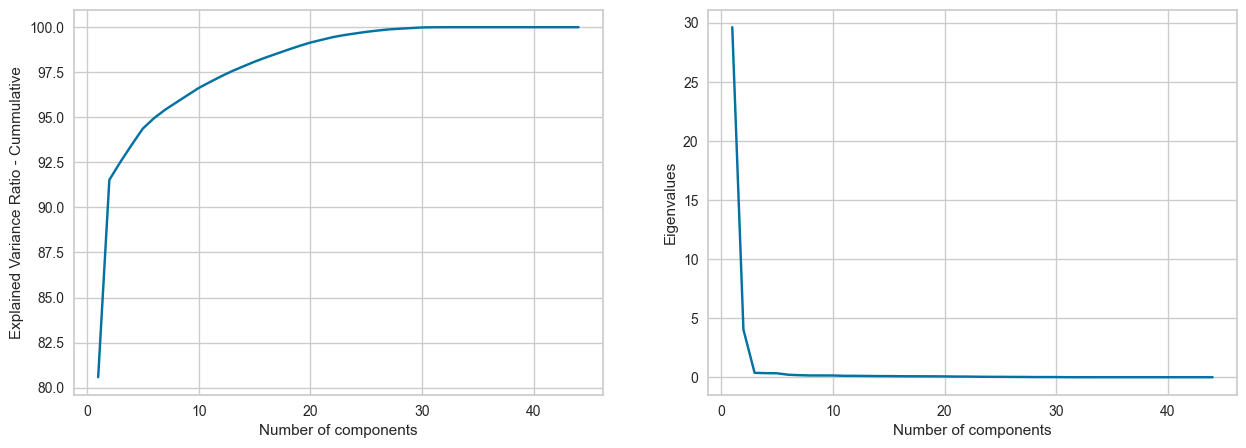

In [170]:
# Plot untuk menjelaskan Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 45), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')
plt.grid()

# Plot untuk melihat Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 45), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.grid()

In [171]:
# Cek total fitur jika ingin mengambil 95% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

7

In [172]:
# Train dataset ke PCA
pcat = PCA(n_components=0.95)
df_final_pca = pcat.fit_transform(df_final)

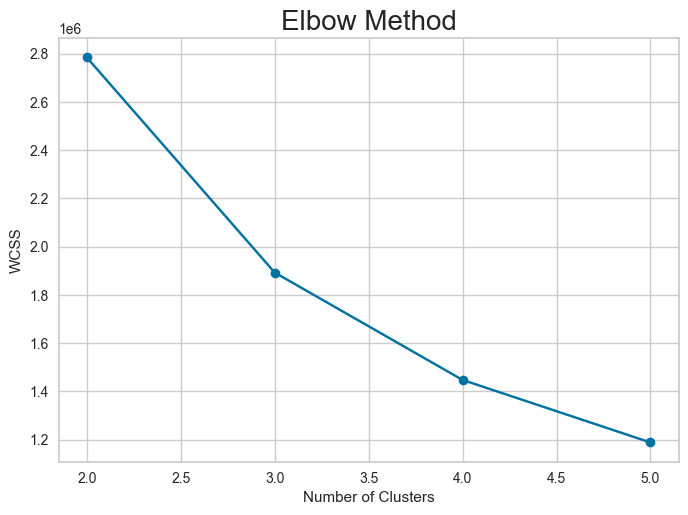

In [173]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 16
max_cluster = 5
for i in range(2, max_cluster+1):
    kmeans = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    kmeans.fit(df_final_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

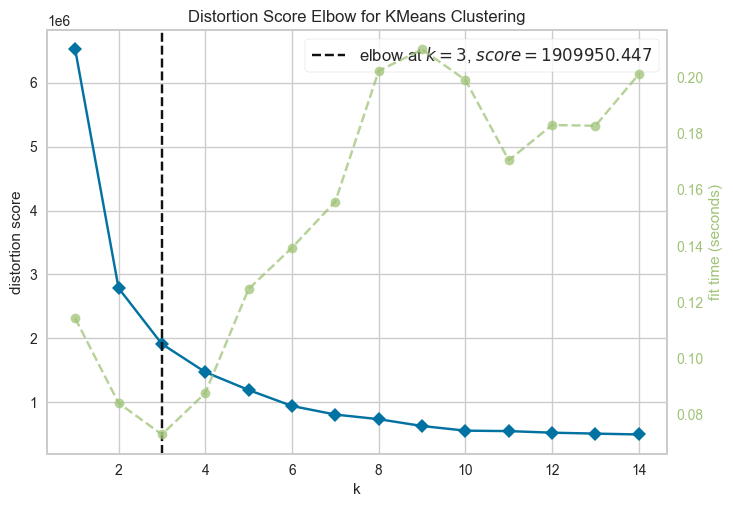

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [174]:
# Define KMeans model
kmeans = KMeans(random_state=16)

# Membuat visualisasi menggunakan KElbow Visualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 15))
    
# Masukkan data ke visualizer
visualizer.fit(df_final_pca)

# Menampilkan Visualisasi Elbow dan score
visualizer.show()

In [175]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

In [176]:
# # Display the Silhouette Score and Plot Silhouette Plot

# plot_silhouette(range(2, max_cluster), df_final_pca, random_state=16)

# Model Training

In [177]:
kmeans = KMeans()

In [178]:
# Train data dengan jumlah cluster optimal
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state=16)
pred = kmeans.fit_predict(df_final_pca)
pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int32)

In [179]:
# Memasukkan hasil data train ke df
df_clean_eda2 = df.copy()
df_clean_eda2['cluster'] = pred
df_clean_eda2

,product_category,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,time_of_day,cluster
0,Laptops and Computers,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night,0
1,Home Appliances,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning,0
2,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening,1
3,Monitors,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon,1
4,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon,0
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,Batterie,AAA Batteries (4-pack),1,2.99,2019-07-06 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,Evening,1
185946,Monitors,27in FHD Monitor,1,149.99,2019-01-06 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,Evening,1
185947,Charging Cables,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,Evening,1
185948,Charging Cables,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,Evening,1


In [180]:
# Cek jumlah nilai tiap cluster
df_clean_eda2['cluster'].value_counts()

cluster
1    94889
0    91061
Name: count, dtype: int64

# EDA 2

<Axes: >

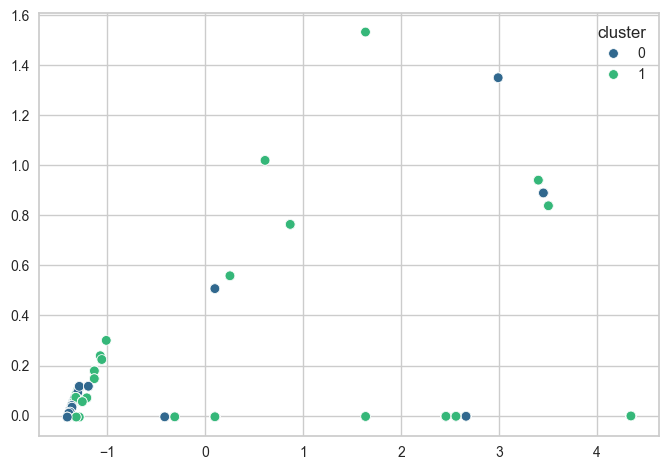

In [181]:
# Cluster visualization dengan scatterplot 2D

pca_2d_final = PCA(n_components=2)
pca_2d_final.fit(df_scaled)

df_scaled_pca_2d = pca_2d_final.fit_transform(df_scaled)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df_clean_eda2['cluster'], palette='viridis')

/var/folders/v6/tfg0h80n4dq87291tslqlg0r0000gn/T/ipykernel_997/3293533244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cluster', data=df_clean_eda2,palette='viridis')


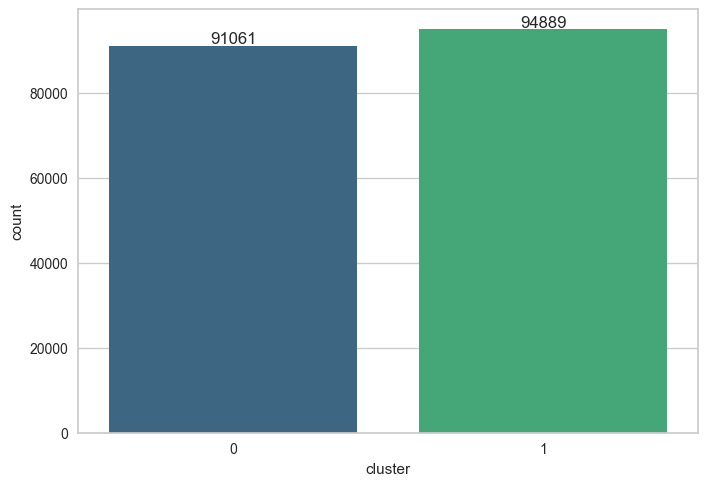

In [182]:
# Menampilkan plot cluster berdasarkan count
ax = sns.countplot(x='cluster', data=df_clean_eda2,palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

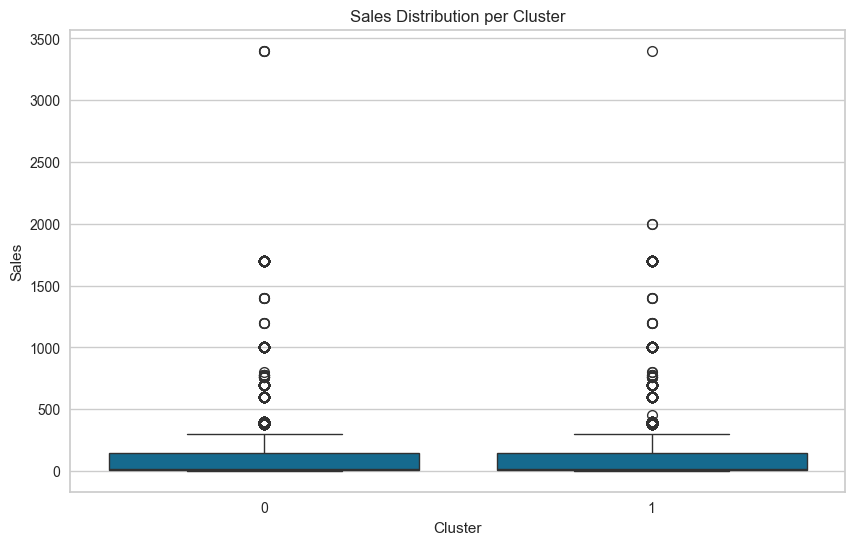

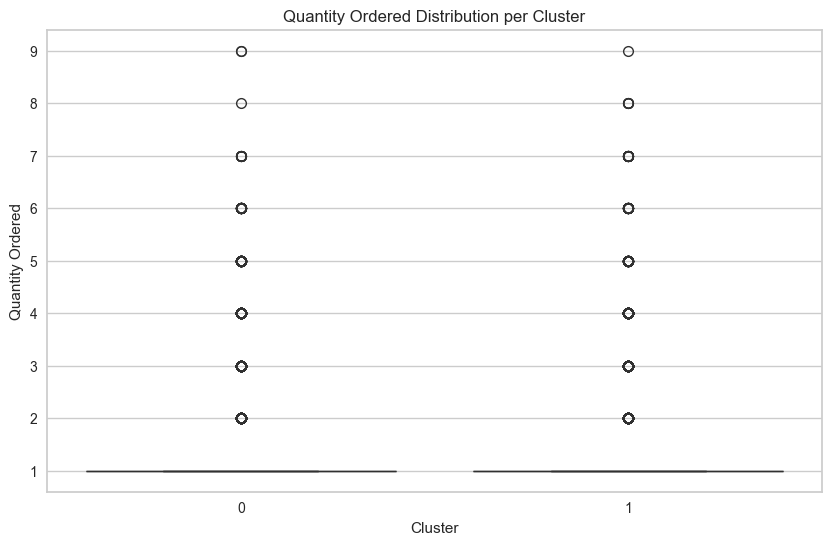

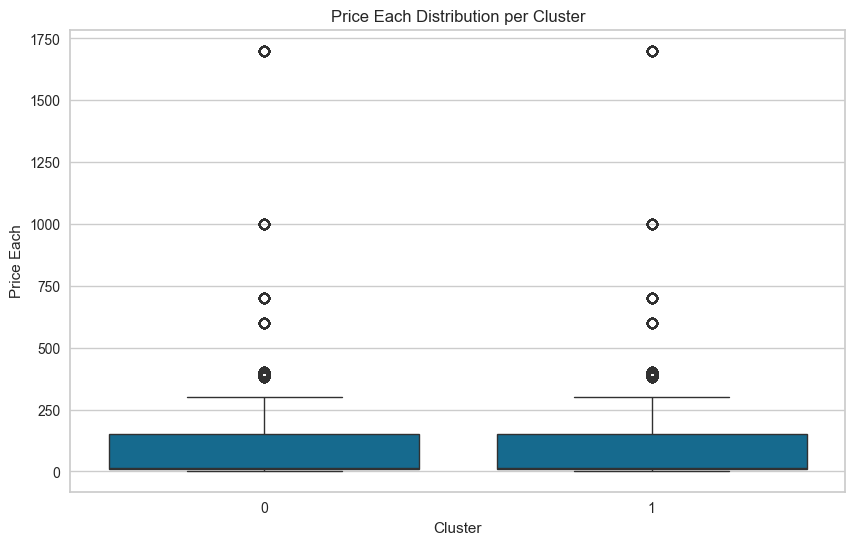

In [183]:
# Box plot for sales across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean_eda2, x='cluster', y='sales')
plt.title('Sales Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sales')
plt.show()

# Box plot for quantity ordered across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean_eda2, x='cluster', y='quantity_ordered')
plt.title('Quantity Ordered Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantity Ordered')
plt.show()

# Box plot for price each across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean_eda2, x='cluster', y='price_each')
plt.title('Price Each Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price Each')
plt.show()


/var/folders/v6/tfg0h80n4dq87291tslqlg0r0000gn/T/ipykernel_997/3470076911.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='sales', hue='cluster', data=df_clean_eda2, palette='viridis', ci=None)


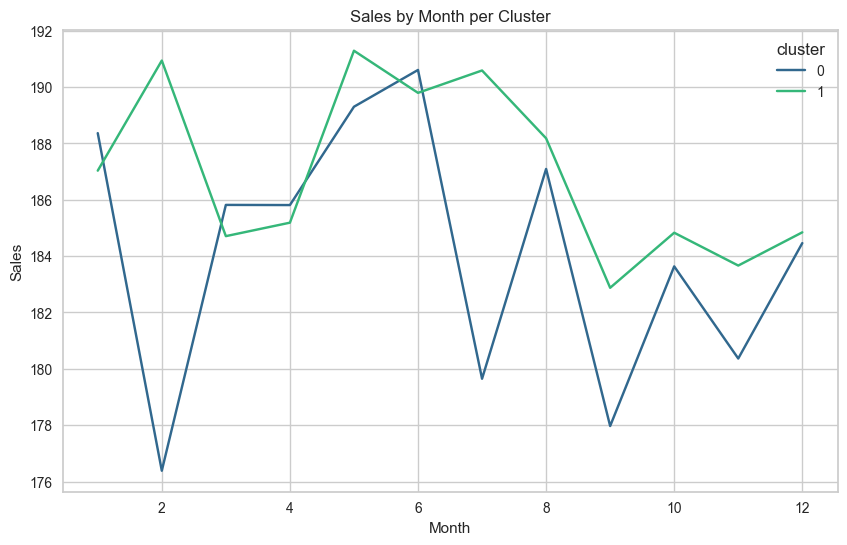

In [184]:
# 4. Sales by Month per Cluster
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='sales', hue='cluster', data=df_clean_eda2, palette='viridis', ci=None)
plt.title('Sales by Month per Cluster')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

/var/folders/v6/tfg0h80n4dq87291tslqlg0r0000gn/T/ipykernel_997/1323942517.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='sales', hue='cluster', data=df_clean_eda2, palette='viridis', ci=None)


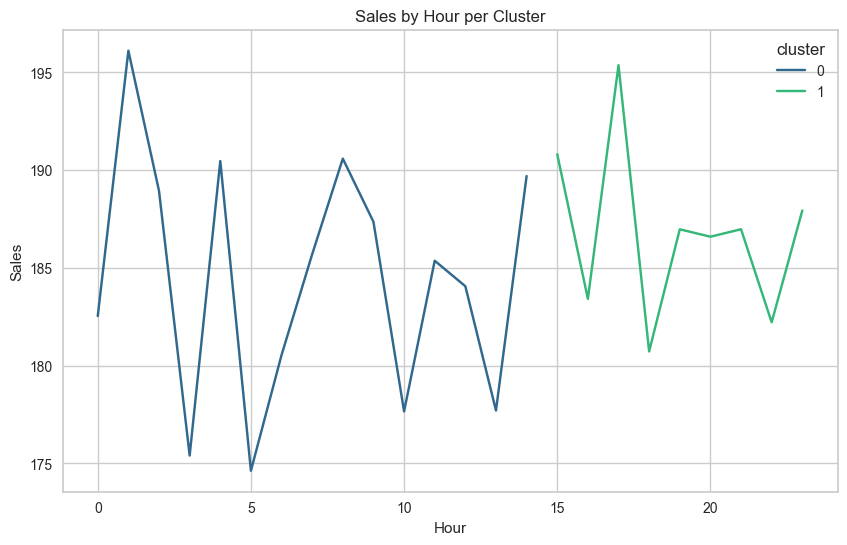

In [185]:
# 5. Sales by Hour per Cluster
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='sales', hue='cluster', data=df_clean_eda2, palette='viridis', ci=None)
plt.title('Sales by Hour per Cluster')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.show()

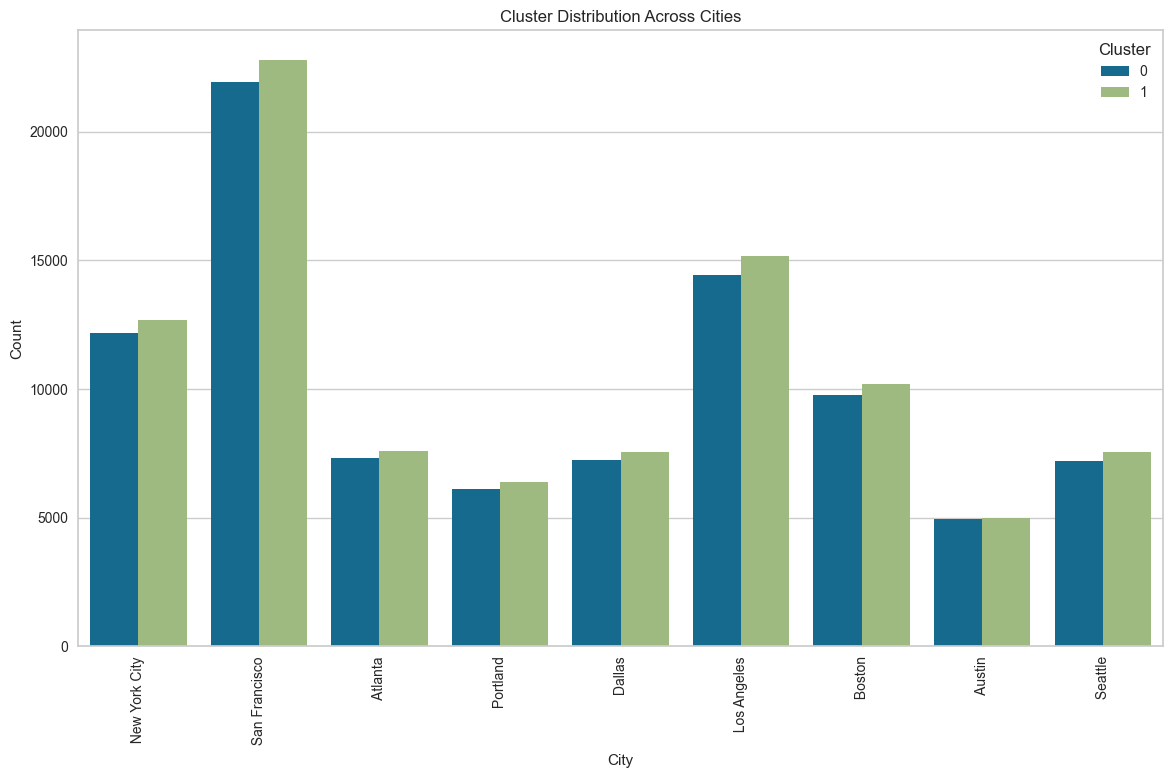

In [186]:
# Bar plot for cluster distribution across cities
plt.figure(figsize=(14, 8))
sns.countplot(data=df_clean_eda2, x='city', hue='cluster')
plt.title('Cluster Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()


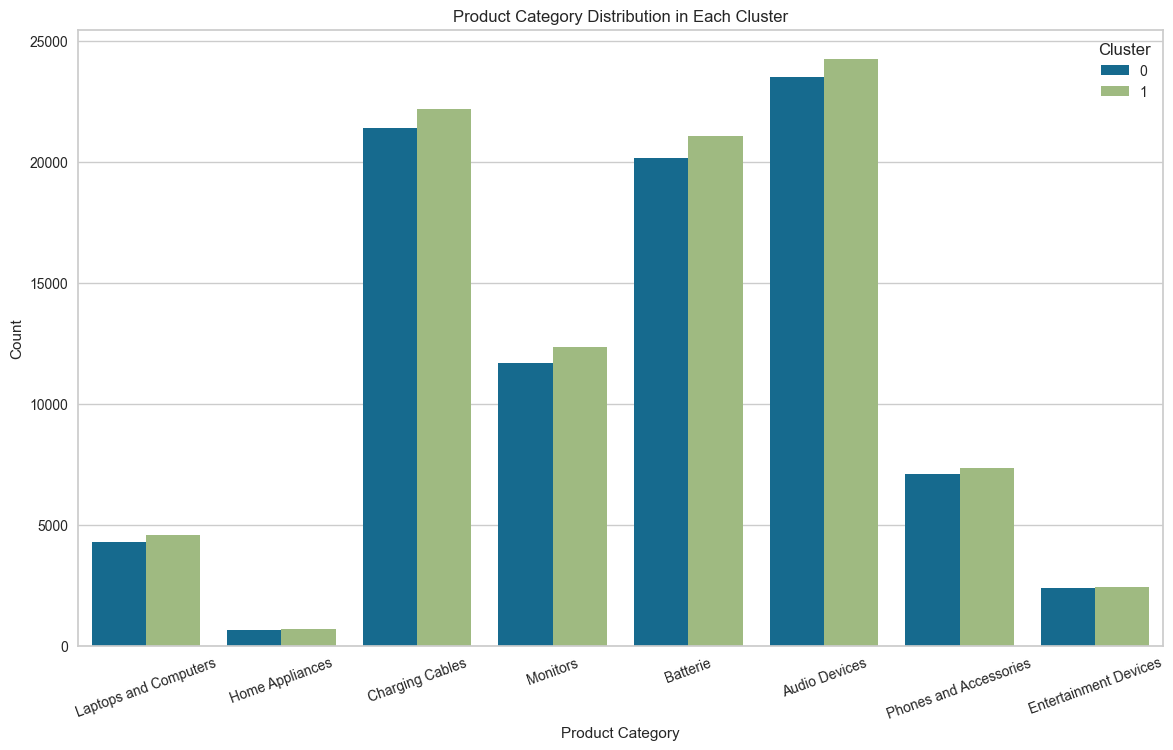

In [187]:
# Bar plot for product category distribution in each cluster
plt.figure(figsize=(14, 8))
sns.countplot(data=df_clean_eda2, x='product_category', hue='cluster')
plt.title('Product Category Distribution in Each Cluster')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.legend(title='Cluster')
plt.show()


/var/folders/v6/tfg0h80n4dq87291tslqlg0r0000gn/T/ipykernel_997/158196451.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='product', y='quantity_ordered', hue='cluster', data=df_clean_eda2, palette='viridis', ci=None)


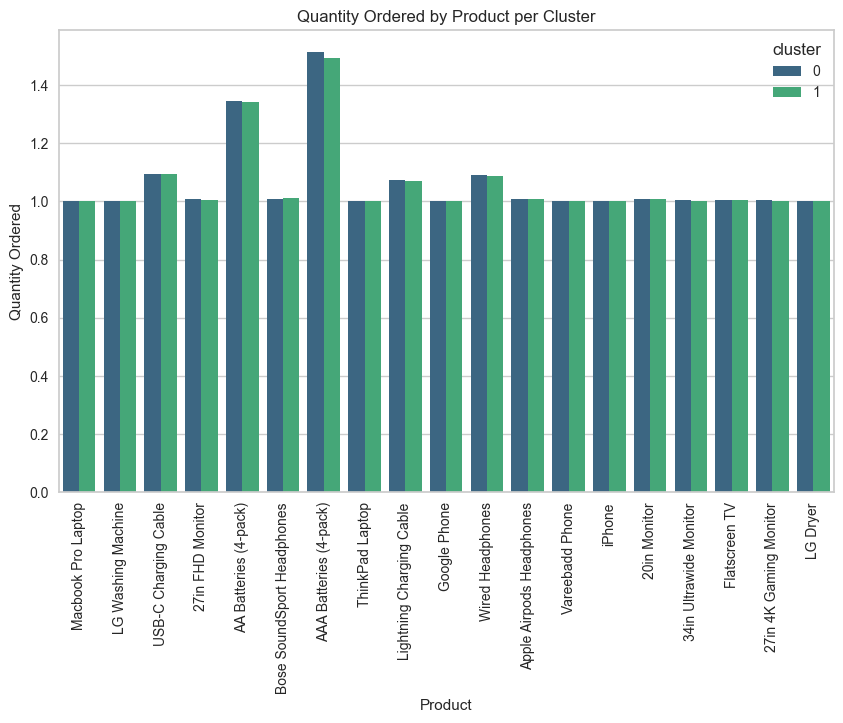

In [188]:
# 7. Quantity Ordered by Product per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='product', y='quantity_ordered', hue='cluster', data=df_clean_eda2, palette='viridis', ci=None)
plt.title('Quantity Ordered by Product per Cluster')
plt.xlabel('Product')
plt.xticks(rotation = 90)
plt.ylabel('Quantity Ordered')
plt.show()

**Perbedaan setiap cluster**:

Kecenderungan keduanya adalah, cluster 1 cenderung lebih memiliki keunggulan dibanding cluster 0. Pada bagian sales, quantity_ordered, dan price each, kedua cluster tidak memiliki perbedaan yang signifikan, hal ini dapat disebabkan karena pembagian cluster keduanya terbilang balance.

Monthly sales, cluster 1 cenderung lebih unggul dibanding cluster 0 disetiap bulannya. Pembelian pada cluster 0 cenderung dilakukan pada jam 00:00 - mendekati jam 15:00. Sedangkan cluster 1 pembelian dilakukan umumnya pada jam 15:00 hingga mendekati jam 00:00.

3 product category yang sering dibeli oleh setiap cluster dari yang terbanyak atau paling sering ke yang paling jarang adalah audio devices, charging cables, dan batterie. 

3 Product yang paling banyak dibeli oleh setiap cluster, AAA Batteries (4-Pack), AA Batteries (4-Pack) dan wired headphones.

**Kesimpulan Cluster**:

Cluster 0:

Cluster 0 adalah customer yang melakukan pembelian pada waktu tengah malam hingga menjelang sore atau sebelum jam 15:00. Kemungkinan adalah cluster ini untuk para customer yang memiliki urgensi membeli barang elektronik yang dibutuhkan disaat sudah tidak memiliki persediaan cadangan dan customer pada cluster ini memiliki lebih banyak waktu luang untuk membeli barang elektronik.

Cluster 1:

Cluster 1 adalah customer yang melakukan pembelian pada waktu sore hari hingga menjelang tengah malam, atau pada jam 15:00 hingga mendekati jam 00:00. Kemungkinan customer pada cluster ini adalah customer yang sibuk bekerja di luar rumah, karena jam pembelian cluster ini dapat disimpulkan berada pada jam luar kantor. Jadi kemungkinan adalah customer pada cluster ini biasanya melakukan pembelian berbarengan dengan pulang kantor.

In [189]:
# Select a random row
random_row = df_clean_eda2.sample(n=1)

# Assign a variable to the selected row
selected_data = random_row.values.flatten()

# Save the selected row to a new CSV file
selected_row_df = pd.DataFrame([selected_data], columns=df_clean_eda2.columns)
selected_row_df.to_csv('selected_data_inf_2.csv', index=False)

# Model Saving

In [190]:
num_capped

,product_category,product,quantity_ordered,price_each,month,sales,city,hour,time_of_day
0,Laptops and Computers,Macbook Pro Laptop,1,564.15,12,564.15,New York City,0,Night
1,Home Appliances,LG Washing Machine,1,564.15,12,564.15,New York City,7,Morning
2,Charging Cables,USB-C Charging Cable,1,11.95,12,11.95,New York City,18,Evening
3,Monitors,27in FHD Monitor,1,149.99,12,149.99,San Francisco,15,Afternoon
4,Charging Cables,USB-C Charging Cable,1,11.95,12,11.95,Atlanta,12,Afternoon
...,...,...,...,...,...,...,...,...,...
185945,Batterie,AAA Batteries (4-pack),1,2.99,6,2.99,Boston,19,Evening
185946,Monitors,27in FHD Monitor,1,149.99,6,149.99,New York City,19,Evening
185947,Charging Cables,USB-C Charging Cable,1,11.95,6,11.95,San Francisco,18,Evening
185948,Charging Cables,USB-C Charging Cable,1,11.95,6,11.95,San Francisco,18,Evening


In [191]:
num_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_category  185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  int64  
 3   price_each        185950 non-null  float64
 4   month             185950 non-null  int64  
 5   sales             185950 non-null  float64
 6   city              185950 non-null  object 
 7   hour              185950 non-null  int64  
 8   time_of_day       185950 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 12.8+ MB


In [192]:
save_num_col = num_capped.select_dtypes(include=['float64']).columns.tolist()
save_cat_col = num_capped.select_dtypes(include='object').columns.tolist()

In [193]:
save_num_col

['price_each', 'sales']

In [194]:
save_cat_col

['product_category', 'product', 'city', 'time_of_day']

In [195]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',RobustScaler(),save_num_col),
        ('cat',OneHotEncoder(handle_unknown='ignore'),save_cat_col)
    ]
)

In [196]:
pipeline_kmeans = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('pca',pca),
    ('kmeans',kmeans)
])

In [197]:
pipeline_kmeans.fit(num_capped)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['price_each', 'sales']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['product_category',
                                                   'product', 'city',
                                                   'time_of_day'])])),
                ('pca', PCA()),
                ('kmeans', KMeans(n_clusters=2, n_init=10, random_state=16))])

In [198]:
with open('pipeline.pkl','wb') as file_1:
    pickle.dump(pipeline_kmeans,file_1)

## model loading

In [199]:
with open('pipeline.pkl','rb') as file_1:
    pipeline_kmeans = pickle.load(file_1)

In [200]:
# Load data Inference
df_inf = pd.read_csv('selected_data_inf_2.csv')

In [201]:
# Memprediksi cluster dari data
pred = pipeline_kmeans.predict(df_inf)

for i in range(len(pred)):
    print('Customer ini termasuk pada CLUSTER:', round(pred[i], 2))

Customer ini termasuk pada CLUSTER: 1


In [202]:
# Inputting cluster into DataFrame
df_inf['Cluster'] = pred

# Show DataFrame
df_inf

,product_category,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,time_of_day,cluster,Cluster
0,Entertainment Devices,Flatscreen TV,1,300.0,2019-03-30 17:54:00,"749 2nd St, San Francisco, CA 94016",3,300.0,San Francisco,17,Afternoon,1,1


## clustered dataset

In [203]:
predict = pipeline_kmeans.predict(num_capped)

In [204]:
# Inputting cluster into DataFrame
num_capped['Cluster'] = predict

# Show DataFrame
num_capped

,product_category,product,quantity_ordered,price_each,month,sales,city,hour,time_of_day,Cluster
0,Laptops and Computers,Macbook Pro Laptop,1,564.15,12,564.15,New York City,0,Night,1
1,Home Appliances,LG Washing Machine,1,564.15,12,564.15,New York City,7,Morning,1
2,Charging Cables,USB-C Charging Cable,1,11.95,12,11.95,New York City,18,Evening,0
3,Monitors,27in FHD Monitor,1,149.99,12,149.99,San Francisco,15,Afternoon,0
4,Charging Cables,USB-C Charging Cable,1,11.95,12,11.95,Atlanta,12,Afternoon,0
...,...,...,...,...,...,...,...,...,...,...
185945,Batterie,AAA Batteries (4-pack),1,2.99,6,2.99,Boston,19,Evening,0
185946,Monitors,27in FHD Monitor,1,149.99,6,149.99,New York City,19,Evening,0
185947,Charging Cables,USB-C Charging Cable,1,11.95,6,11.95,San Francisco,18,Evening,0
185948,Charging Cables,USB-C Charging Cable,1,11.95,6,11.95,San Francisco,18,Evening,0


In [205]:
num_capped[num_capped["Cluster"] == 1]

,product_category,product,quantity_ordered,price_each,month,sales,city,hour,time_of_day,Cluster
0,Laptops and Computers,Macbook Pro Laptop,1,564.15,12,564.15,New York City,0,Night,1
1,Home Appliances,LG Washing Machine,1,564.15,12,564.15,New York City,7,Morning,1
11,Laptops and Computers,ThinkPad Laptop,1,564.15,12,564.15,Los Angeles,17,Afternoon,1
16,Phones and Accessories,Google Phone,1,564.15,12,564.15,Boston,12,Afternoon,1
27,Home Appliances,LG Washing Machine,1,564.15,12,564.15,San Francisco,11,Morning,1
...,...,...,...,...,...,...,...,...,...,...
185924,Home Appliances,LG Dryer,1,564.15,6,564.15,New York City,13,Afternoon,1
185934,Monitors,34in Ultrawide Monitor,1,379.99,6,379.99,San Francisco,20,Evening,1
185936,Monitors,27in 4K Gaming Monitor,1,389.99,6,389.99,San Francisco,23,Evening,1
185942,Phones and Accessories,iPhone,1,564.15,6,564.15,New York City,22,Evening,1


## recommender

In [206]:
# Load your data
cluster_data = df_inf # Replace "cluster_data.csv" with your cluster data file
main_data = pd.read_csv("sales_data_clean.csv")

In [207]:
main_data.head(5)

,product_category,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,time_of_day
0,Laptops and Computers,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,Home Appliances,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,Monitors,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon


In [208]:
# Define recommendation logic
def recommend_top_products_for_cluster(cluster):
    cluster_data = num_capped[num_capped['Cluster'] == cluster]
    # Count the occurrences of each product within the cluster
    Description = num_capped['product'].value_counts()
    # Select the top 5 most frequent products
    top_products = Description.head(5).index.tolist()
    return top_products

# Get unique clusters
clusters = num_capped['Cluster'].unique()

# Generate recommendations for each cluster
recommendations = {}
for cluster in clusters:
    recommendations[cluster] = recommend_top_products_for_cluster(cluster)

# Print recommendations for each cluster
for cluster, top_products in recommendations.items():
    print("Top 5 products for Cluster {}: {}".format(cluster, top_products))


Top 5 products for Cluster 1: ['USB-C Charging Cable', 'Lightning Charging Cable', 'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones']
Top 5 products for Cluster 0: ['USB-C Charging Cable', 'Lightning Charging Cable', 'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones']


In [209]:
import pandas as pd

# Assuming 'cluster_data' and 'main_data' are already defined

# Define recommendation logic
def recommend_top_products_for_cluster(cluster):
    cluster_data = num_capped[num_capped['Cluster'] == cluster]
    # Count the occurrences of each product within the cluster
    description_counts = cluster_data['product'].value_counts()
    # Select the top 5 most frequent products
    top_products = description_counts.head(5).index.tolist()
    return top_products

# Get unique clusters
clusters = num_capped['Cluster'].unique()

# Initialize a list to store recommendations
recommendations = []

# Generate recommendations for each cluster
for cluster in clusters:
    top_products = recommend_top_products_for_cluster(cluster)
    recommendations.append({ 'Recommended Products': top_products})

# Convert the list of dictionaries to a DataFrame
recommendations_df = pd.DataFrame(recommendations)

# Explode the DataFrame to separate each recommendation into a separate row
recommendations_df = recommendations_df.explode('Recommended Products')

# Reset index
recommendations_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
recommendations_df

,Recommended Products
0,iPhone
1,27in 4K Gaming Monitor
2,34in Ultrawide Monitor
3,Google Phone
4,Flatscreen TV
5,USB-C Charging Cable
6,Lightning Charging Cable
7,AAA Batteries (4-pack)
8,AA Batteries (4-pack)
9,Wired Headphones


In [210]:
#Sample 10,000 rows randomly
df_sampled = df_final.sample(n=10000, random_state=1)

In [211]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between products
cosine_sim = cosine_similarity(df_sampled)

In [212]:
df_sampled

,product_category_Audio Devices,product_category_Batterie,product_category_Charging Cables,product_category_Entertainment Devices,product_category_Home Appliances,product_category_Laptops and Computers,product_category_Monitors,product_category_Phones and Accessories,product_20in Monitor,product_27in 4K Gaming Monitor,product_27in FHD Monitor,product_34in Ultrawide Monitor,product_AA Batteries (4-pack),product_AAA Batteries (4-pack),product_Apple Airpods Headphones,product_Bose SoundSport Headphones,product_Flatscreen TV,product_Google Phone,product_LG Dryer,product_LG Washing Machine,product_Lightning Charging Cable,product_Macbook Pro Laptop,product_ThinkPad Laptop,product_USB-C Charging Cable,product_Vareebadd Phone,product_Wired Headphones,product_iPhone,city_ Atlanta,city_ Austin,city_ Boston,city_ Dallas,city_ Los Angeles,city_ New York City,city_ Portland,city_ San Francisco,city_ Seattle,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,price_each,sales,quantity_ordered,hour
28623,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.978196,0.978196,1,20
82381,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.021731,-0.021731,1,22
34130,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.108294,2,1
91337,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.644259,2.644259,1,19
60351,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.644259,2.644259,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.978196,0.978196,1,10
7820,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.021442,-0.021442,1,19
1065,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.616009,0.616009,1,15
170393,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.080478,-0.080478,1,18


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_category  185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  int64  
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
 6   month             185950 non-null  int64  
 7   sales             185950 non-null  float64
 8   city              185950 non-null  object 
 9   hour              185950 non-null  int64  
 10  time_of_day       185950 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 15.6+ MB


In [214]:
df

,product_category,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,time_of_day
0,Laptops and Computers,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,Home Appliances,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,Monitors,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
185945,Batterie,AAA Batteries (4-pack),1,2.99,2019-07-06 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,Evening
185946,Monitors,27in FHD Monitor,1,149.99,2019-01-06 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,Evening
185947,Charging Cables,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,Evening
185948,Charging Cables,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,Evening


In [215]:
def recommend_similar_products(product_name, top_n=3):
    # Find the index of the product
    product_index = df[df['product'] == product_name].index[0]
    
    # Get the similarity scores for the product
    similarity_scores = cosine_sim[product_index]
    
    # Get indices of the top N similar products
    similar_indices = similarity_scores.argsort()[-(top_n+1):-1][::-1]
    
    # Get the product names of the similar products
    similar_products = df.iloc[similar_indices]
    
    print(f"Products similar to '{product_name}':")
    for index, row in similar_products.iterrows():
        print(f"{row['product']} (Category: {row['product_category']}, Price: ${row['price_each']})")

# Test the function
recommend_similar_products('Lightning Charging Cable')


Products similar to 'Lightning Charging Cable':
Wired Headphones (Category: Audio Devices, Price: $11.99)
Lightning Charging Cable (Category: Charging Cables, Price: $14.95)
Lightning Charging Cable (Category: Charging Cables, Price: $14.95)


In [216]:
df[df['product'] == "Lightning Charging Cable"].sample(20)

,product_category,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,time_of_day
91389,Charging Cables,Lightning Charging Cable,1,14.95,2019-08-05 18:15:00,"392 Lakeview St, San Francisco, CA 94016",5,14.95,San Francisco,18,Evening
148122,Charging Cables,Lightning Charging Cable,1,14.95,2019-02-09 01:05:00,"159 Johnson St, San Francisco, CA 94016",9,14.95,San Francisco,1,Night
168457,Charging Cables,Lightning Charging Cable,1,14.95,2019-10-07 11:22:00,"253 Park St, San Francisco, CA 94016",7,14.95,San Francisco,11,Morning
82251,Charging Cables,Lightning Charging Cable,1,14.95,2019-03-08 16:46:00,"691 Walnut St, Seattle, WA 98101",8,14.95,Seattle,16,Afternoon
152865,Charging Cables,Lightning Charging Cable,1,14.95,2019-09-09 10:36:00,"272 Park St, New York City, NY 10001",9,14.95,New York City,10,Morning
134769,Charging Cables,Lightning Charging Cable,1,14.95,2019-10-23 18:16:00,"79 Adams St, New York City, NY 10001",10,14.95,New York City,18,Evening
59197,Charging Cables,Lightning Charging Cable,1,14.95,2019-03-17 12:49:00,"888 7th St, Austin, TX 73301",3,14.95,Austin,12,Afternoon
142262,Charging Cables,Lightning Charging Cable,2,14.95,2019-01-01 09:21:00,"444 Dogwood St, San Francisco, CA 94016",1,29.90,San Francisco,9,Morning
124421,Charging Cables,Lightning Charging Cable,1,14.95,2019-10-13 08:24:00,"566 Main St, Los Angeles, CA 90001",10,14.95,Los Angeles,8,Morning
158612,Charging Cables,Lightning Charging Cable,1,14.95,2019-07-31 00:44:00,"414 Lakeview St, Portland, OR 97035",7,14.95,Portland,0,Night


In [217]:
df

,product_category,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,hour,time_of_day
0,Laptops and Computers,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,Home Appliances,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,Monitors,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,Charging Cables,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
185945,Batterie,AAA Batteries (4-pack),1,2.99,2019-07-06 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,Evening
185946,Monitors,27in FHD Monitor,1,149.99,2019-01-06 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,Evening
185947,Charging Cables,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,Evening
185948,Charging Cables,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,Evening


In [218]:
# Test the function
recommend_similar_products('LG Washing Machine')

Products similar to 'LG Washing Machine':
Lightning Charging Cable (Category: Charging Cables, Price: $14.95)
LG Washing Machine (Category: Home Appliances, Price: $600.0)
AA Batteries (4-pack) (Category: Batterie, Price: $3.84)


In [219]:
def recommend_similar_products(product_name, top_n=3):
    # Find the index of the product
    product_index = df[df['product'] == product_name].index[0]
    
    # Get the similarity scores for the product
    similarity_scores = cosine_sim[product_index]
    
    # Get indices of the top N similar products
    similar_indices = similarity_scores.argsort()[-(top_n+1):-1][::-1]
    
    # Get the product names and total quantity sold of the similar products
    similar_products = df.iloc[similar_indices].copy()
    similar_products['total_quantity_sold'] = similar_products['product'].map(df.groupby('product')['quantity_ordered'].sum())
    
    print(f"Products similar to '{product_name}':")
    for index, row in similar_products.iterrows():
        print(f"{row['product']} (Category: {row['product_category']}, Price: ${row['price_each']}, "
              f"Quantity Ordered: {row['quantity_ordered']}, Total Quantity Sold: {row['total_quantity_sold']})")

# Test the function
recommend_similar_products('27in FHD Monitor')

Products similar to '27in FHD Monitor':
27in FHD Monitor (Category: Monitors, Price: $149.99, Quantity Ordered: 1, Total Quantity Sold: 7550)
AA Batteries (4-pack) (Category: Batterie, Price: $3.84, Quantity Ordered: 1, Total Quantity Sold: 27635)
27in 4K Gaming Monitor (Category: Monitors, Price: $389.99, Quantity Ordered: 1, Total Quantity Sold: 6244)


In [220]:
import pandas as pd

# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract additional features
df['day_of_week'] = df['order_date'].dt.day_name()
df['week_of_year'] = df['order_date'].dt.isocalendar().week
df['is_weekend'] = df['order_date'].dt.dayofweek >= 5


In [221]:
# Aggregate sales by month
monthly_sales = df.groupby('month')['sales'].sum()

# Aggregate sales by day of the week
daily_sales = df.groupby('day_of_week')['sales'].sum()


In [222]:
def recommend_based_on_date(current_date, top_n=5):
    # Convert current_date to datetime
    current_date = pd.to_datetime(current_date)
    
    # Extract features from current_date
    current_month = current_date.month
    current_day_of_week = current_date.day_name()
    
    # Filter products that are popular in the current month or day of the week
    popular_products = df[(df['month'] == current_month) | (df['day_of_week'] == current_day_of_week)]
    
    # Get top N products based on sales
    top_products = popular_products.groupby('product')['sales'].sum().nlargest(top_n).index.tolist()
    
    return top_products
    
# Example usage
recommendations = recommend_based_on_date('2024-08-07')
print(f"Recommended products: {recommendations}")


Recommended products: ['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', '27in 4K Gaming Monitor']


In [223]:
# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month from 'order_date'
df['month'] = df['order_date'].dt.month

def recommend_by_month(current_date, top_n=5):
    # Convert current_date to datetime
    current_date = pd.to_datetime(current_date)
    
    # Extract the month from current_date
    current_month = current_date.month
    
    # Filter products that are popular in the current month
    popular_products = df[df['month'] == current_month]
    
    # Get top N products based on sales
    top_products = popular_products.groupby('product')['sales'].sum().nlargest(top_n).index.tolist()
    
    return top_products
    
# Example usage
recommendations = recommend_by_month('2023-01')
print(f"Recommended products for the month: {recommendations}")

Recommended products for the month: ['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', 'Apple Airpods Headphones']


In [224]:
# df.to_csv('main_data.csv', index=False)